# Continuous Probabilistic Methods Exercises

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Define a function named get_lower_and_upper_bounds that has two arguments. 
- The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [2]:
def get_lower_upper_limits(df, multiplier=1.5):
    
    # find the first and 3rd quartile
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    
    # find IQR
    iqr = q3 - q1
    
    # calculate upper and lower limits
    lower_limit = q1 - (multiplier * iqr)
    upper_limit = q3 + (multiplier * iqr)
    
    # create dataframe of outliers below lower limit or above upper limit
    df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    
    return df

## 1) Using lemonade.csv dataset and focusing on continuous variables:
- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
- Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [3]:
df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [5]:
df.isna().sum()

Date           0
Day            0
Temperature    0
Rainfall       0
Flyers         0
Price          0
Sales          0
dtype: int64

### Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [6]:
# define multiplier
multiplier = 1.5

# find the first and 3rd quartile
q1 = df['Temperature'].quantile(0.25)
q3 = df['Temperature'].quantile(0.75)

# find IQR
iqr = q3 - q1

# calculate upper and lower limits
lower_limit = q1 - (multiplier * iqr)
upper_limit = q3 + (multiplier * iqr)

lower_limit, upper_limit

(16.700000000000003, 104.7)

In [7]:
# create dataframe of outliers above upper_limit and below lower_limit?
df[(df['Temperature'] < lower_limit) | (df['Temperature'] > upper_limit)]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [8]:
col = 'Rainfall'

# define multiplier
multiplier = 1.5

# find the first and 3rd quartile
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)

# find IQR
iqr = q3 - q1

# calculate upper and lower limits
lower_limit = q1 - (multiplier * iqr)
upper_limit = q3 + (multiplier * iqr)

lower_limit, upper_limit

(0.26, 1.3)

In [9]:
df[(df[col] < lower_limit) | (df[col] > upper_limit)].head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13


In [10]:
df['Temperature'].quantile(0.25)

49.7

In [11]:
# identify columns
cols = ['Temperature','Rainfall','Flyers','Sales']

for col in cols:
    # define multiplier
    multiplier = 1.5

    # find the first and 3rd quartile
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    # find IQR
    iqr = q3 - q1

    # calculate upper and lower limits
    lower_limit = q1 - (multiplier * iqr)
    upper_limit = q3 + (multiplier * iqr)
    
    df_limits = df[(df[col] < lower_limit)]
    print(f'----------{col} Below Lower Limit-----------')
    print(df_limits)

----------Temperature Below Lower Limit-----------
         Date     Day  Temperature  Rainfall  Flyers  Price  Sales
364  12/31/17  Sunday         15.1       2.5       9    0.5      7
----------Rainfall Below Lower Limit-----------
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
----------Flyers Below Lower Limit-----------
         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20
----------Sales Below Lower Limit-----------
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []


### Do the outlier makes sense? Should they be kept?
- Keep Tempature at 15 , that seems legit
- Remove Flyers at -38, that seem like an error

### Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [12]:
# identify columns
cols = ['Temperature','Rainfall','Flyers','Sales']

for col in cols:
    # define multiplier
    multiplier = 1.5

    # find the first and 3rd quartile
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    # find IQR
    iqr = q3 - q1

    # calculate upper and lower limits
    lower_limit = q1 - (multiplier * iqr)
    upper_limit = q3 + (multiplier * iqr)
    
    df_limits = df[(df[col] > upper_limit)]
    print(f'----------{col} Above Upper Limit-----------')
    print(df_limits)

----------Temperature Above Upper Limit-----------
       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21
----------Rainfall Above Upper Limit-----------
         Date        Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17     Sunday         27.0      2.00      15    0.5     10
1      1/2/17     Monday         28.9      1.33      15    0.5     13
2      1/3/17    Tuesday         34.5      1.33      27    0.5     15
5      1/6/17     Friday         25.3      1.54      23    0.5     11
6      1/7/17   Saturday         32.9      1.54      19    0.5     13
10    1/11/17  Wednesday         32.6      1.54      23    0.5     12
11    1/12/17   Thursday         38.2      1.33      16    0.5     14
12    1/13/17     Friday         37.5      1.33      19    0.5     15
15    1/16/17     Monday         30.6      1.67      24    0.5     12
16    1/17/17    Tuesday         32.2      1.43      26    0.5     

### Do the outlier makes sense? Which should be kept?
- Tempature at 212 seems like an error, remove
- Flyers at 77 and 80 seem high but not too bad, keep
- Sales at 534 seems too high, probably erro, remove
- Other sales are high but will keep

### Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [13]:
# identify columns
cols = ['Temperature','Rainfall','Flyers','Sales']

for col in cols:
    # define multiplier
    multiplier = 2

    # find the first and 3rd quartile
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    # find IQR
    iqr = q3 - q1

    # calculate upper and lower limits
    lower_limit = q1 - (multiplier * iqr)
    upper_limit = q3 + (multiplier * iqr)
    
    df_limits = df[(df[col] < lower_limit)]
    print(f'----------{col} Below Lower Limit-----------')
    print(df_limits)

----------Temperature Below Lower Limit-----------
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
----------Rainfall Below Lower Limit-----------
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []
----------Flyers Below Lower Limit-----------
         Date      Day  Temperature  Rainfall  Flyers  Price  Sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20
----------Sales Below Lower Limit-----------
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []


###  Do these lower outliers make sense? Which outliers should be kept?
- Flyers at -38 seems like an error, remove

### Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [14]:
# identify columns
cols = ['Temperature','Rainfall','Flyers','Sales']

for col in cols:
    # define multiplier
    multiplier = 2

    # find the first and 3rd quartile
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    # find IQR
    iqr = q3 - q1

    # calculate upper and lower limits
    lower_limit = q1 - (multiplier * iqr)
    upper_limit = q3 + (multiplier * iqr)
    
    df_limits = df[(df[col] > upper_limit)]
    print(f'----------{col} Above Upper Limit-----------')
    print(df_limits)

----------Temperature Above Upper Limit-----------
       Date       Day  Temperature  Rainfall  Flyers  Price  Sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21
----------Rainfall Above Upper Limit-----------
         Date        Day  Temperature  Rainfall  Flyers  Price  Sales
0      1/1/17     Sunday         27.0      2.00      15    0.5     10
5      1/6/17     Friday         25.3      1.54      23    0.5     11
6      1/7/17   Saturday         32.9      1.54      19    0.5     13
10    1/11/17  Wednesday         32.6      1.54      23    0.5     12
15    1/16/17     Monday         30.6      1.67      24    0.5     12
23    1/24/17    Tuesday         28.6      1.54      20    0.5     12
337   12/4/17     Monday         34.9      1.54      16    0.5     13
338   12/5/17    Tuesday         22.0      1.82      11    0.5     10
343  12/10/17     Sunday         31.3      1.82      15    0.5     11
347  12/14/17   Thursday         31.9      1.54      24    0.5     

### Do these upper outliers make sense? Which outliers should be kept?
- Temperature at 212 too high, seems like an error, remove
- Rainfall at 2 or higher seems too high, drop. Keep all other rainfall
- Sales at 534 too high, drop. Keep all others.

## 2) Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:
- Use a 2 sigma decision rule to isolate the outliers.
    - Do these make sense?
    - Should certain outliers be kept or removed?

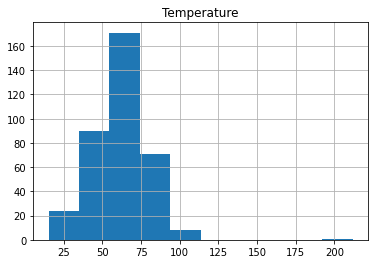

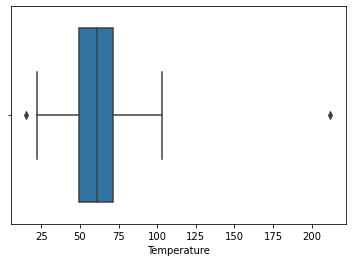

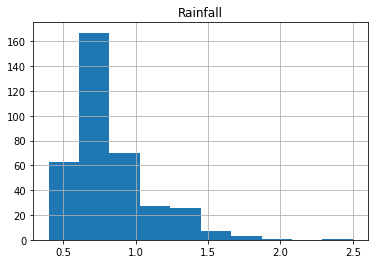

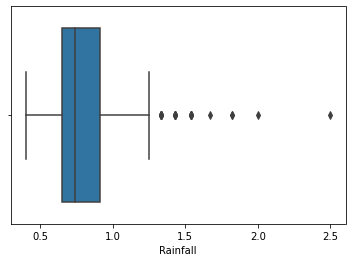

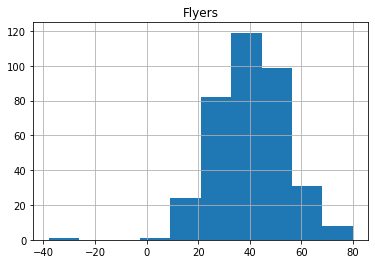

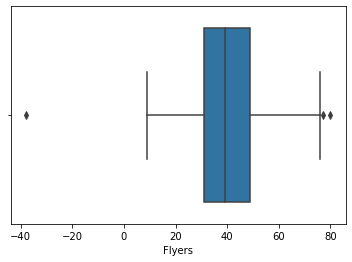

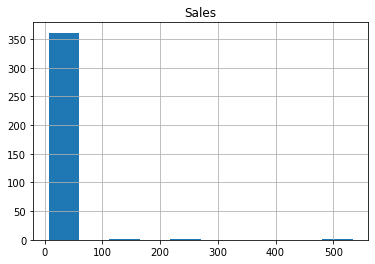

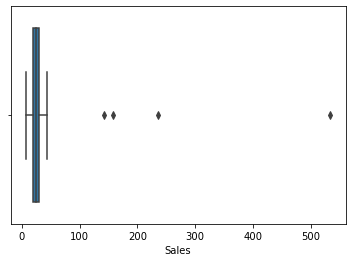

In [15]:
# identify columns
cols = ['Temperature','Rainfall','Flyers','Sales']

for col in cols: 
        df[col].hist()
        plt.title(col)
        plt.show()
        sns.boxplot(data=df, x=col)
        plt.show()

### Which columns are normally distribuited?
- Temperature, Rainfall, Flyers

### For normally distributed columns: Use a 2 sigma decision rule to isolate the outliers.

In [17]:
# z-score:
# subtract from the mean, divide by the standard deviation
# i.e (x - x_mean) / x_std

col = ['Temperature']

df['temp_z'] = ((df[col] - df[col].mean())
                     / df[col].std())
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_z
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340
1,1/2/17,Monday,28.9,1.33,15,0.5,13,-1.787286
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,-1.477652
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,-0.946852
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,-1.040848


In [19]:
# Isolate outlier with sigma of 2
df[df['temp_z'].abs() >= 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_z
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,8.336627
166,6/16/17,Friday,99.3,0.47,77,0.5,41,2.105251
176,6/26/17,Monday,102.6,0.47,60,0.5,42,2.287714
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,2.304301
190,7/10/17,Monday,98.0,0.49,66,0.5,40,2.033372
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41,2.105251
202,7/22/17,Saturday,99.6,0.47,49,0.5,42,2.121838
207,7/27/17,Thursday,97.9,0.47,74,0.5,43,2.027843
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,-2.168799
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,-2.550311


In [20]:
col = ['Rainfall']

df['rainfall_z'] = ((df[col] - df[col].mean())
                     / df[col].std())
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_z,rainfall_z
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488
1,1/2/17,Monday,28.9,1.33,15,0.5,13,-1.787286,1.840253
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,-1.477652,1.840253
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,-0.946852,0.817946
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,-1.040848,0.635391


In [21]:
# Isolate outlier with sigma of 2
df[df['rainfall_z'].abs() >= 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_z,rainfall_z
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488
5,1/6/17,Friday,25.3,1.54,23,0.5,11,-1.986336,2.606983
6,1/7/17,Saturday,32.9,1.54,19,0.5,13,-1.566119,2.606983
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12,-1.582706,2.606983
15,1/16/17,Monday,30.6,1.67,24,0.5,12,-1.693290,3.081626
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14,-1.604823,2.205363
19,1/20/17,Friday,31.6,1.43,20,0.5,12,-1.637998,2.205363
23,1/24/17,Tuesday,28.6,1.54,20,0.5,12,-1.803873,2.606983
337,12/4/17,Monday,34.9,1.54,16,0.5,13,-1.455535,2.606983
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,-2.168799,3.629291


In [22]:
col = ['Flyers']

df['flyers_z'] = ((df[col] - df[col].mean())
                     / df[col].std())
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_z,rainfall_z,flyers_z
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488,-1.820927
1,1/2/17,Monday,28.9,1.33,15,0.5,13,-1.787286,1.840253,-1.820927
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,-1.477652,1.840253,-0.950507
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,-0.946852,0.817946,-0.877972
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,-1.040848,0.635391,-0.515297


In [23]:
# Isolate outlier with sigma of 2
df[df['flyers_z'].abs() >= 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_z,rainfall_z,flyers_z
166,6/16/17,Friday,99.3,0.47,77,0.5,41,2.105251,-1.299691,2.676244
170,6/20/17,Tuesday,85.1,0.54,70,0.5,37,1.320109,-1.044114,2.168499
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41,1.828792,-1.299691,2.603709
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,1.779030,-1.153647,2.023429
183,7/3/17,Monday,81.5,0.54,68,0.5,235,1.121058,-1.044114,2.023429
194,7/14/17,Friday,92.0,0.50,80,0.5,40,1.701621,-1.190158,2.893849
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41,2.105251,-1.299691,2.603709
203,7/23/17,Sunday,89.1,0.51,72,0.5,37,1.541275,-1.153647,2.313569
204,7/24/17,Monday,83.5,0.57,69,0.5,35,1.231642,-0.934581,2.095964
207,7/27/17,Thursday,97.9,0.47,74,0.5,43,2.027843,-1.299691,2.458639


### Do these make sense? Should certain outliers be kept or removed?
- Flyers at -38 remove
- Rainfall at or above 2, remove
- Temp at 212, remove

## 3) Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [25]:
# z-score for temperature at sigma 3
# subtract from the mean, divide by the standard deviation
# i.e (x - x_mean) / x_std

col = ['Temperature']

df['temp_z3'] = ((df[col] - df[col].mean())
                     / df[col].std())

# Isolate outlier with sigma of 2
df[df['temp_z3'].abs() >= 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_z,rainfall_z,flyers_z,temp_z3
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,8.336627,0.306792,-0.370227,8.336627


In [26]:
# find outliers for Rainfall using Sigma 3
col = ['Rainfall']

df['rainfall_z3'] = ((df[col] - df[col].mean())
                     / df[col].std())

# Isolate outlier with sigma of 3
df[df['rainfall_z3'].abs() >= 3]


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_z,rainfall_z,flyers_z,temp_z3,rainfall_z3
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488,-1.820927,-1.892340,4.286488
15,1/16/17,Monday,30.6,1.67,24,0.5,12,-1.693290,3.081626,-1.168112,-1.693290,3.081626
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,-2.168799,3.629291,-2.111067,-2.168799,3.629291
343,12/10/17,Sunday,31.3,1.82,15,0.5,11,-1.654586,3.629291,-1.820927,-1.654586,3.629291
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,-2.550311,6.112037,-2.256137,-2.550311,6.112037


In [27]:
# find outliers for Flyers using Sigma 3
col = ['Flyers']

df['flyers_z3'] = ((df[col] - df[col].mean())
                     / df[col].std())

# Isolate outlier with sigma of 3
df[df['flyers_z3'].abs() >= 3]


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_z,rainfall_z,flyers_z,temp_z3,rainfall_z3,flyers_z3
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20,-0.786506,0.452836,-5.665283,-0.786506,0.452836,-5.665283


### Do these make sense? Should certain outliers be kept or removed?
- Temp at 212
- Rainfall at 1.67 and up
- Flyers at -38

In [28]:
for col in cols:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)
df

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_z,rainfall_z,flyers_z,temp_z3,rainfall_z3,flyers_z3,Temperature_zscore,Rainfall_zscore,Flyers_zscore,Sales_zscore
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488,-1.820927,-1.892340,4.286488,-1.820927,-1.894938,4.292372,-1.823427,-0.578073
1,1/2/17,Monday,28.9,1.33,15,0.5,13,-1.787286,1.840253,-1.820927,-1.787286,1.840253,-1.820927,-1.789739,1.842779,-1.823427,-0.481003
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,-1.477652,1.840253,-0.950507,-1.477652,1.840253,-0.950507,-1.479680,1.842779,-0.951812,-0.416291
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,-0.946852,0.817946,-0.877972,-0.946852,0.817946,-0.877972,-0.948151,0.819069,-0.879177,-0.351578
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,-1.040848,0.635391,-0.515297,-1.040848,0.635391,-0.515297,-1.042276,0.636263,-0.516004,-0.319221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19,-1.024260,0.635391,-0.515297,-1.024260,0.635391,-0.515297,-1.025666,0.636263,-0.516004,-0.286865
361,12/28/17,Thursday,37.8,1.25,32,0.5,16,-1.295189,1.548165,-0.587832,-1.295189,1.548165,-0.587832,-1.296967,1.550290,-0.588639,-0.383934
362,12/29/17,Friday,39.5,1.25,17,0.5,15,-1.201194,1.548165,-1.675857,-1.201194,1.548165,-1.675857,-1.202842,1.550290,-1.678157,-0.416291
363,12/30/17,Saturday,30.9,1.43,22,0.5,13,-1.676702,2.205363,-1.313182,-1.676702,2.205363,-1.313182,-1.679004,2.208390,-1.314984,-0.481003


In [ ]:
# # brian's example
# # a for loop to systematically add a zscore column for every normally distr. col.
# # define the normally distributed columns:
# normal_cols = ['Temperature','Rainfall','Flyers']
# # create an empty dictionary to store the zscore array, to be appended to the df later
# result = {}
# # for loop to add a zed score col to the df, one for each normally distr. col.
# for col in normal_cols:
#     # calculate zed score
#     z_score = ((df[col] - df[col].mean()) / df[col].std())
#     # add resulting array to the result dictionary created above
#     result[f'{col}_zscore'] = z_score
# # turn these result arrays into a datafram
# result = pd.DataFrame(result)
# # and concatenate
# zscore_df = pd.concat([df,result], axis = 1).drop(columns='Date')
# zscore_df